In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Admissions.csv to Admissions.csv


In [7]:
data = pd.read_csv("Admissions.csv")
data.head()
# DATA = Table.read_table("Admissions.csv")
# DATA.show(3)
# DATA.scatter('rank','gpa', colors = 2)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [8]:
features = data[['gre','gpa','rank']]
features[0:5]


,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4


In [9]:
TARGET = data[['admit']]
TARGET[0:5]

,admit
0,0
1,1
2,1
3,1
4,0


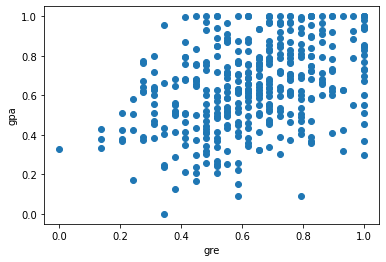

In [10]:
# SCALE PREDICTOR between 0 and 1
featuresSCALED = preprocessing.minmax_scale(data[['gre','gpa','rank']])
featuresSCALED[0:5]
plt.scatter(featuresSCALED[:,0], featuresSCALED[:,1])
plt.xlabel("gre")
plt.ylabel("gpa")
plt.show()

In [11]:
print(TARGET[:5])

   admit
0      0
1      1
2      1
3      1
4      0


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# ENCODE the RESPONSE VARIABLE
TARGETS = np.array(data["admit"])
print(TARGETS[0:5])
print(type(TARGETS))

TARGETS_onehot  = pd.get_dummies(TARGETS)
TARGETShot = np.array(TARGETS_onehot)
print(TARGETShot[0:5,:])

[0 1 1 1 0]
<class 'numpy.ndarray'>
[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]]


In [13]:
# PRINTING again the PREDICTORS and the RESPONSE variables 
print(type(featuresSCALED))
print(featuresSCALED.shape)
print(featuresSCALED[:5,:])

print(type(TARGETShot))
print(TARGETShot.shape)
print(TARGETShot[:5])

<class 'numpy.ndarray'>
(400, 3)
[[0.27586207 0.77586207 0.66666667]
 [0.75862069 0.81034483 0.66666667]
 [1.         1.         0.        ]
 [0.72413793 0.53448276 1.        ]
 [0.51724138 0.38505747 1.        ]]
<class 'numpy.ndarray'>
(400, 2)
[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]]


In [14]:
# here to make the NEURAL NETWORK MODEL
features = featuresSCALED
output = TARGETShot

features_shape = features.shape[1]
print(features_shape)

output_shape = output.shape[1]
print(output_shape)

3
2


In [21]:
# STARTING with the NUMBER of HIDDEN LAYERS
# the NUMBER of HIDDEN LAYES
hidden_nodes = 5

In [22]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1234
TRAIN_features, TEST_features, TRAIN_output, TEST_output = train_test_split(featuresSCALED, output, test_size=0.33, random_state = RANDOM_SEED)

In [27]:
# here making the NEURAL NETWORK in KERAS
model = Sequential()
model.add(Dense(hidden_nodes, input_dim = features_shape, activation = "relu"))
model.add(Dense(output_shape, activation = "softmax"))

model.compile(loss="categorical_crossentropy", optimizer = "adam")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [28]:
# training the model 
epochs = 1000
hist = model.fit(TRAIN_features, TRAIN_output, epochs = epochs, batch_size = 128, verbose=0 )

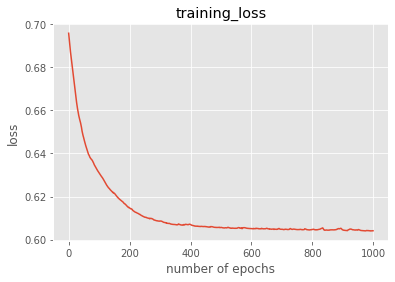

In [29]:
# in order to visualize the LOSSES

training_loss = hist.history["loss"]
xc = range(epochs)
plt.plot(xc, training_loss)
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.title("training_loss")
plt.grid(True)
plt.style.use(["ggplot"])

In [ ]:
# PRINT the values of all the weights and bias of all the neurons of the Neural Network

In [30]:
for layerNum, layer in enumerate(model.layers):
    print("Weights Values = ")
    weights = layer.get_weights()[0]
    print(weights)
    print("Bias Values = ")
    biases = layer.get_weights()[1]
    print(biases)
    print("                      ")     

Weights Values = 
[[-0.20194668 -0.21194094  0.50764066 -0.37906674  0.32746077]
 [-0.3928844  -0.62578994 -0.73177755  0.108449    1.0846086 ]
 [-0.5917715   0.06521213 -1.0572082   0.96809804 -0.88941413]]
Bias Values = 
[ 0.          0.          0.05660692  0.31654593 -0.02237751]
                      
Weights Values = 
[[ 0.06181973  0.8939266 ]
 [-0.27781528 -0.37847495]
 [-1.267848    1.2757901 ]
 [ 0.3523119  -0.811611  ]
 [ 0.04158379  0.98815614]]
Bias Values = 
[ 0.18425266 -0.18425266]
                      


In [34]:
# here predicting the outcome of the TEST_FEATURES

PREDICTIONS = model.predict(TEST_features)
predictClass = np.argmax(PREDICTIONS, axis=1)
print(predictClass)

[0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [38]:
# the values of the TEST_OUTPUT

the_OUTPUT_of_the_MODEL = np.argmax(TEST_output, axis =1)
print(the_OUTPUT_of_the_MODEL)

[0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1]


In [43]:
# BUILDING the CONFUSION MATRIX
CM = confusion_matrix(predictClass, the_OUTPUT_of_the_MODEL)
print(CM)
print("Accuracy Score:", accuracy_score(predictClass, the_OUTPUT_of_the_MODEL))

[[92 23]
 [11  6]]
Accuracy Score: 0.7424242424242424
